# Nearest Centroid Classification

The following example illustrates the nearest centroid classification algorithm on a number of different data sets.

In [1]:
# imports for plotting, numerical operations
#import matplotlib.pylab as pl
import matplotlib.pyplot as pl
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

## Data Generation Functions

The following functions generate 
- two class data set with spherical covariance (uncorrelated data)
- two class data set with non-spherical covariance (correlated data)
- three class data set with non-spherical covariance (correlated data)


In [2]:
def make_data_threeclass(N=90):
    mu = np.array([[0,3],[0,-3],[2,1]]).T
    C = np.array([[5.,4.],[4.,5.]])
    n_samples_per_class = int(N/3)
    X = np.hstack((
        mvn(mu[:,0],C,n_samples_per_class).T,
        mvn(mu[:,1],C,n_samples_per_class).T,
        mvn(mu[:,2],C,n_samples_per_class).T))
    labels = np.ones(n_samples_per_class, dtype=int)
    y = np.hstack((labels,2*labels,3*labels))-1
    # generates some toy data
    return X.T,y.T

def make_data_twoclass(N=100):
    # generates some toy data
    mu = np.array([[0,3],[0,-3]]).T
    n_samples_per_class = int(N/2)
    C = np.array([[5.,4.],[4.,5.]])
    X = np.hstack((
            mvn(mu[:,0],C,n_samples_per_class).T, 
            mvn(mu[:,1],C,n_samples_per_class).T
        ))
    Y = np.hstack((np.zeros((n_samples_per_class)),(np.ones((n_samples_per_class)))))
    return X.T,Y.T
    

def make_data_spherical(N=100):
    # generates some toy data
    mu = np.array([[0,3],[0,-3]]).T
    n_samples_per_class = int(N/2)
    C = np.eye(2)
    # stretch in x1 and a bit in x2 direction
    # C = [[8, 0], [0, 4]] 
    # mean of random number sets
    # print('mu[:,0] =',mu[:,0] )
    # print('mu[:,1] =',mu[:,1] )
   
    # K = mvn(mu[:,0],C,n_samples_per_class)
    # KT = mvn(mu[:,0],C,n_samples_per_class).T
    # print ('K:',K)
    # print ('KT:',KT)
    
    X = np.hstack((         
        mvn(mu[:,0],C,n_samples_per_class).T, 
        mvn(mu[:,1],C,n_samples_per_class).T
    ))
    Y = np.hstack((np.zeros((n_samples_per_class)),(np.ones((n_samples_per_class)))))
    # print (X.T)
    # print (Y.T)
    # print ('slice X', X.T[:,0])
        
    return X.T,Y.T


def make_plot_nclass(X,y,mu=None):
    colors = "brymcwg"
    
    if mu is not None:
        # Plot the decision boundary.
        h = .02 # stepsize in mesh
        #h = 1.5 # stepsize in mesh
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = predict_ncc(np.c_[xx.ravel(), yy.ravel()],mu)
        Z = Z.reshape(xx.shape)
        cs = pl.contourf(xx, yy, Z, cmap=pl.cm.Paired,alpha=.6)

    # plot the data
    for class_idx, class_name in enumerate(np.unique(y)):
        idx = y == class_name
        pl.plot(X[idx, 0], X[idx, 1], colors[int(class_idx)%6]+'o')
        if mu is not None:
            pl.plot(mu[class_idx, 0],mu[class_idx, 1],colors[int(class_idx)%6]+'o',markersize=20)

    pl.axis('tight')
    pl.xlabel('$X_1$')
    pl.ylabel('$X_2$')

## Example: Plotting some artificial data

We generate 100 2D data points with different means and spherical covariance and plot the data set.

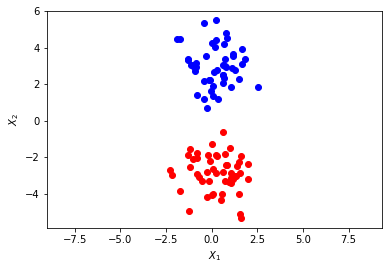

In [3]:
# generate some artificial data
X, Y = make_data_spherical()
make_plot_nclass(X,Y)
pl.axis('equal');

## Nearest Centroid Classification Algorithm

Implement the code stubs that perform nearest centroid classification training and prediction

In [4]:
def fit_ncc(X,Y):
    '''
    Input: 
    X samples-by-data-dimensions data matrix
    Y label vector
    
    Output: 
    mu class means stored in a number-of-classes-by-data-dimensions matrix
    '''
    unique_classes = np.unique(Y)
    # print ( 'unique: ',unique_classes )
    # print ('X.shape: ', X.shape)
    mu = np.zeros((len(unique_classes), X.shape[1]))
    # print(mu)
    
    for idx, class_type in enumerate(unique_classes):
        # unique returns flot?!?!
        # print('X: ',X[Y==x,:])
        # mu[x,:]
        mu[idx,:] = X[Y==class_type,:].mean(axis=0)
        # print('mu: ',p)
    
    #print('mu: ',mu)
    return mu
    
def predict_ncc(X,mu):
    '''
    Performs neares centroid prediction
    
    Input: 
    X samples-by-data-dimensions data matrix
    mu class means stored in a number-of-classes-by-data-dimensions matrix
    
    Output:
    Y_predicted prediction as vector of length samples
    '''
    # print('X: ', X.shape)
    # print('mu.shape: ', mu.shape)
    # Y_predicted0 = X.shape
    
    dists = []
    #x = X[1:10,:]
    #print('sel x: ',x)
    for mu_idx in range(mu.shape[0]):
        dists.append( np.linalg.norm(X - mu[mu_idx,:], axis=1 ) )
        # alternative without linalg.norm
        #dists.append(np.sqrt( ((x-mu[mu_idx,:])**2).sum(axis=1) ))
        
    #print('dists: ',dists)
    #print('make array: ',np.array(dists)) 
    Y_predicted0 = np.array(dists).argmin(axis=0)
    
    #print('min: ', Y_predicted0)
    
    #Y_predicted0.append(np.array(dists))
    #print(dists)

    #import pdb; pdb.set_trace()
    
    #does not patter, because only one dim anyway
    #return np.vstack(Y_predicted0)
    #return Y_predicted0
    return np.array(dists).argmin(axis=0)
    

## Nearest Centroid Classification Application Example

The following cell runs three different examples and shows the classification of the NCC classifier

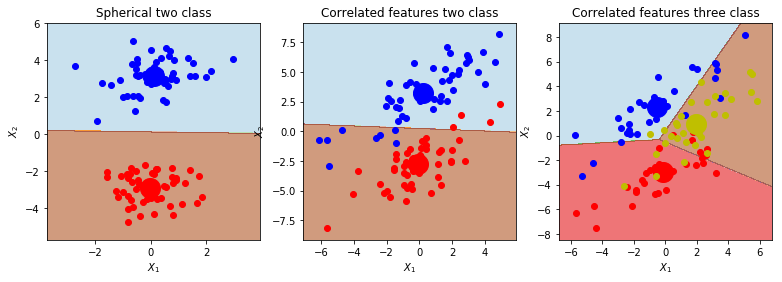

In [5]:
pl.figure(figsize=(13,4))

pl.subplot(1,3,1)
X, Y = make_data_spherical()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Spherical two class')

pl.subplot(1,3,2)
X, Y = make_data_twoclass()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Correlated features two class')

pl.subplot(1,3,3)
X, Y = make_data_threeclass()
mu = fit_ncc(X,Y)
make_plot_nclass(X, Y, mu)
pl.title('Correlated features three class');